In [1]:
from dataclasses import dataclass
import networkx as nx # pip install networkx
import matplotlib.pyplot as plt # pip install matplotlib
from math import lcm
from player_helper_code import generateMemoryMap, build_graph_from_memory, MazeGraph, Square

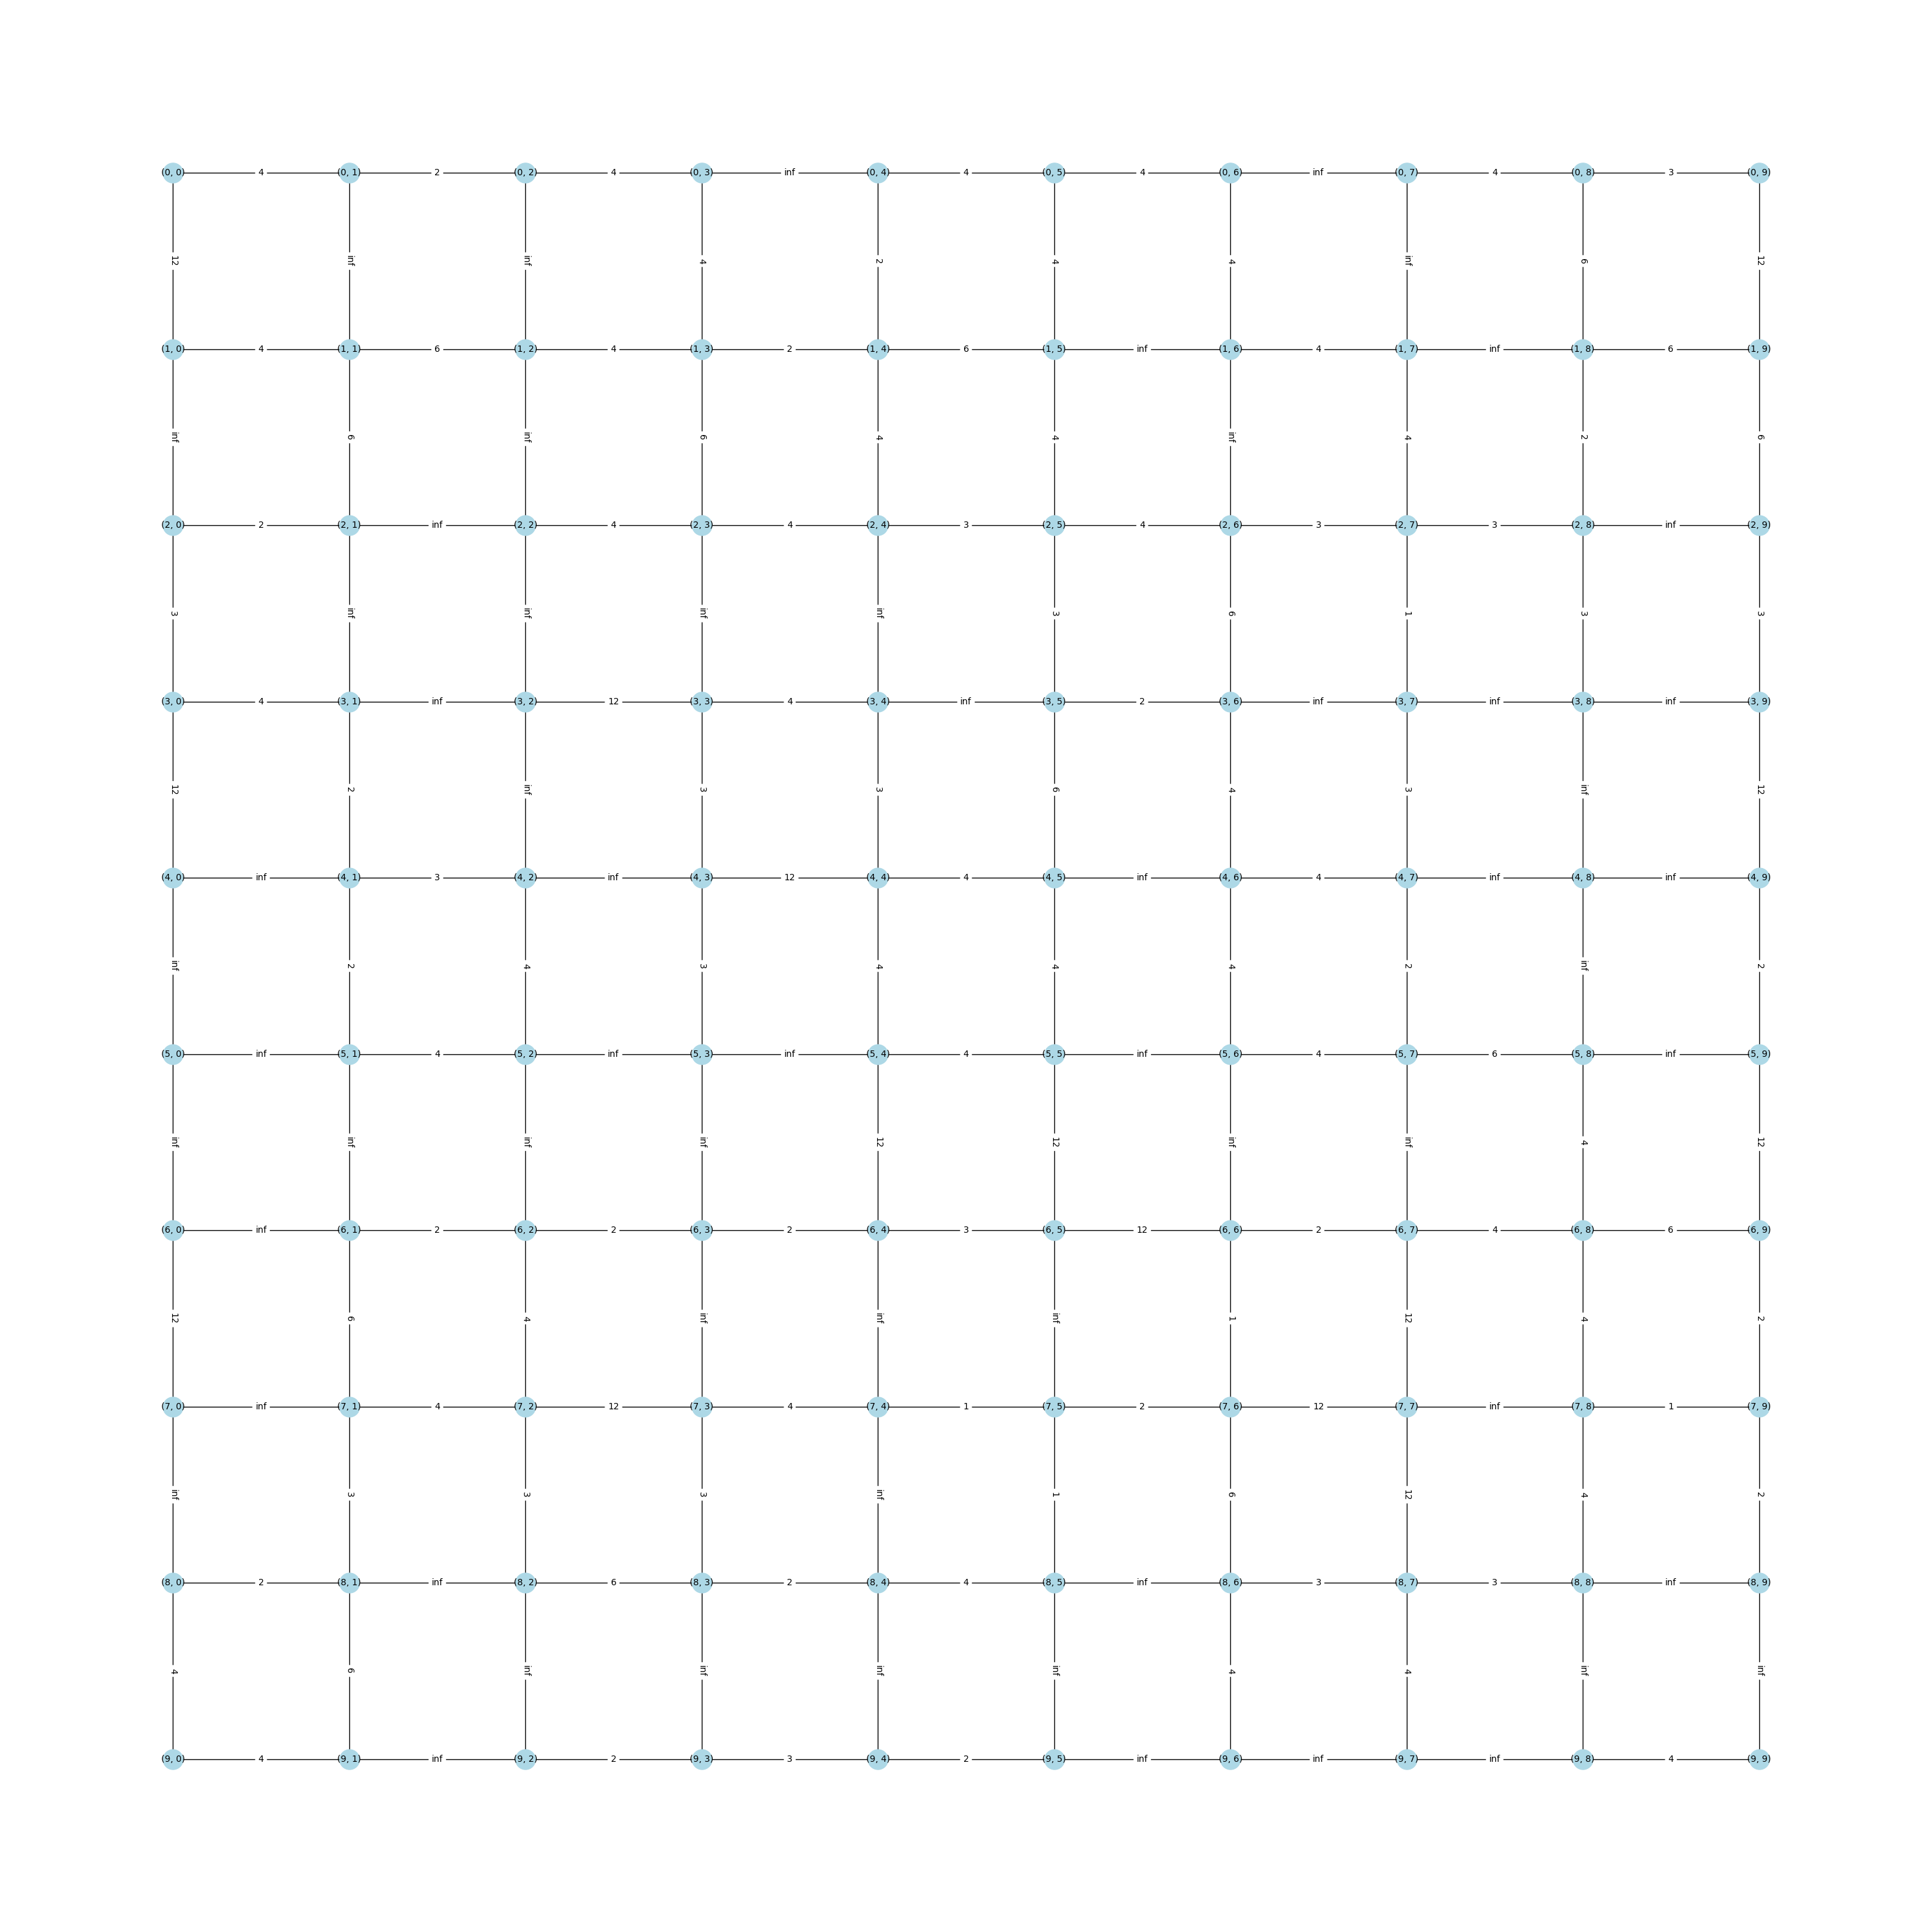

In [2]:
mem_map = generateMemoryMap(dim=10)
graph = build_graph_from_memory(mem_map)
graph.visualize_graph_in_grid()

In [3]:
import heapq

def findShortestPathsToEachNode(graph: MazeGraph, startNode: tuple, turnNumber: int):
    dimension = graph.getMazeDimension()

    # Initialize the minDistanceArray with infinity
    minDistanceArray = [[float('inf')] * dimension for _ in range(dimension)]
    minDistanceArray[startNode[0]][startNode[1]] = 0  # Start node has distance 0

    # Initialize the parent dictionary to track the shortest path and the turn when we moved to this node
    # parent[(x, y)] = (parentNode, turnWeMovedToNode)
    parent = {startNode: (None, turnNumber)}  # Initially at startNode at the given turnNumber

    # Min-heap stores (distance, (x, y) node)
    minHeap = [(0, startNode)]  # Start node with distance 0

    visitedNodes = set()

    # Process the heap until it is empty
    while minHeap:
        turnsToCurrentNode, currentNode = heapq.heappop(minHeap)
        currentXCoord, currentYCoord = currentNode

        # Skip node if already visited
        if currentNode in visitedNodes:
            continue

        visitedNodes.add(currentNode)

        # Get neighbors of the current node from the graph
        neighbors: dict[tuple, int] = graph.getNeighbors(currentNode)

        for (xCoordNeighbour, yCoordNeighbour), (node1Freq, node2Freq) in neighbors.items():
            # Combined Frequency of the doors
            if node1Freq == 0 or node2Freq == 0:
                combinedFrequencey = float('inf')
            else:
                # LCM is the combined frequency of the doors
                combinedFrequencey = lcm(node1Freq, node2Freq)

            # Determine the turn number when we reach this node
            turnWeWillBeAtThisNode = turnNumber + turnsToCurrentNode

            # Calculate the number of turns we need to wait for the door to open
            turnsToWait = (combinedFrequencey - (turnWeWillBeAtThisNode % combinedFrequencey)) % combinedFrequencey

            newTurnsToGetToNeighbor = turnsToCurrentNode + turnsToWait + 1

            # Update the neighbor's distance if a shorter path is found
            if newTurnsToGetToNeighbor < minDistanceArray[xCoordNeighbour][yCoordNeighbour]:
                minDistanceArray[xCoordNeighbour][yCoordNeighbour] = newTurnsToGetToNeighbor
                # Store both the parent node and the turn at which we moved to this neighbor
                parent[(xCoordNeighbour, yCoordNeighbour)] = (currentNode, turnWeWillBeAtThisNode + turnsToWait + 1)
                heapq.heappush(minHeap, (newTurnsToGetToNeighbor, (xCoordNeighbour, yCoordNeighbour)))

    return minDistanceArray, parent  # Return both distances and paths


In [4]:
mem_map = generateMemoryMap(dim=10)
graph = build_graph_from_memory(mem_map)
minDistanceArray, parent = findShortestPathsToEachNode(graph, (0, 0), turnNumber=1)
minDistanceArray

[[0, 12, 21, 24, 30, 33, 36, 48, 50, 52],
 [21, 18, 20, 24, 25, inf, 47, 48, 54, 55],
 [28, 24, 21, 22, 24, 48, 46, 47, 72, 60],
 [28, 25, 22, 36, 30, 42, 45, 48, 60, 56],
 [28, 26, 24, 26, 28, 36, 40, 50, 52, 54],
 [32, 28, 30, 64, 60, 48, 44, 52, 54, 56],
 [39, 36, 40, 42, 45, 46, 46, 56, 58, inf],
 [40, 40, 42, 45, 48, 48, 48, 58, 59, 66],
 [50, 48, 44, 48, 60, 60, 54, 57, 60, 64],
 [52, 50, 56, 54, 61, 60, 56, inf, inf, inf]]

(9, 9)
9
9
inf
Target node (9, 9) is unreachable.


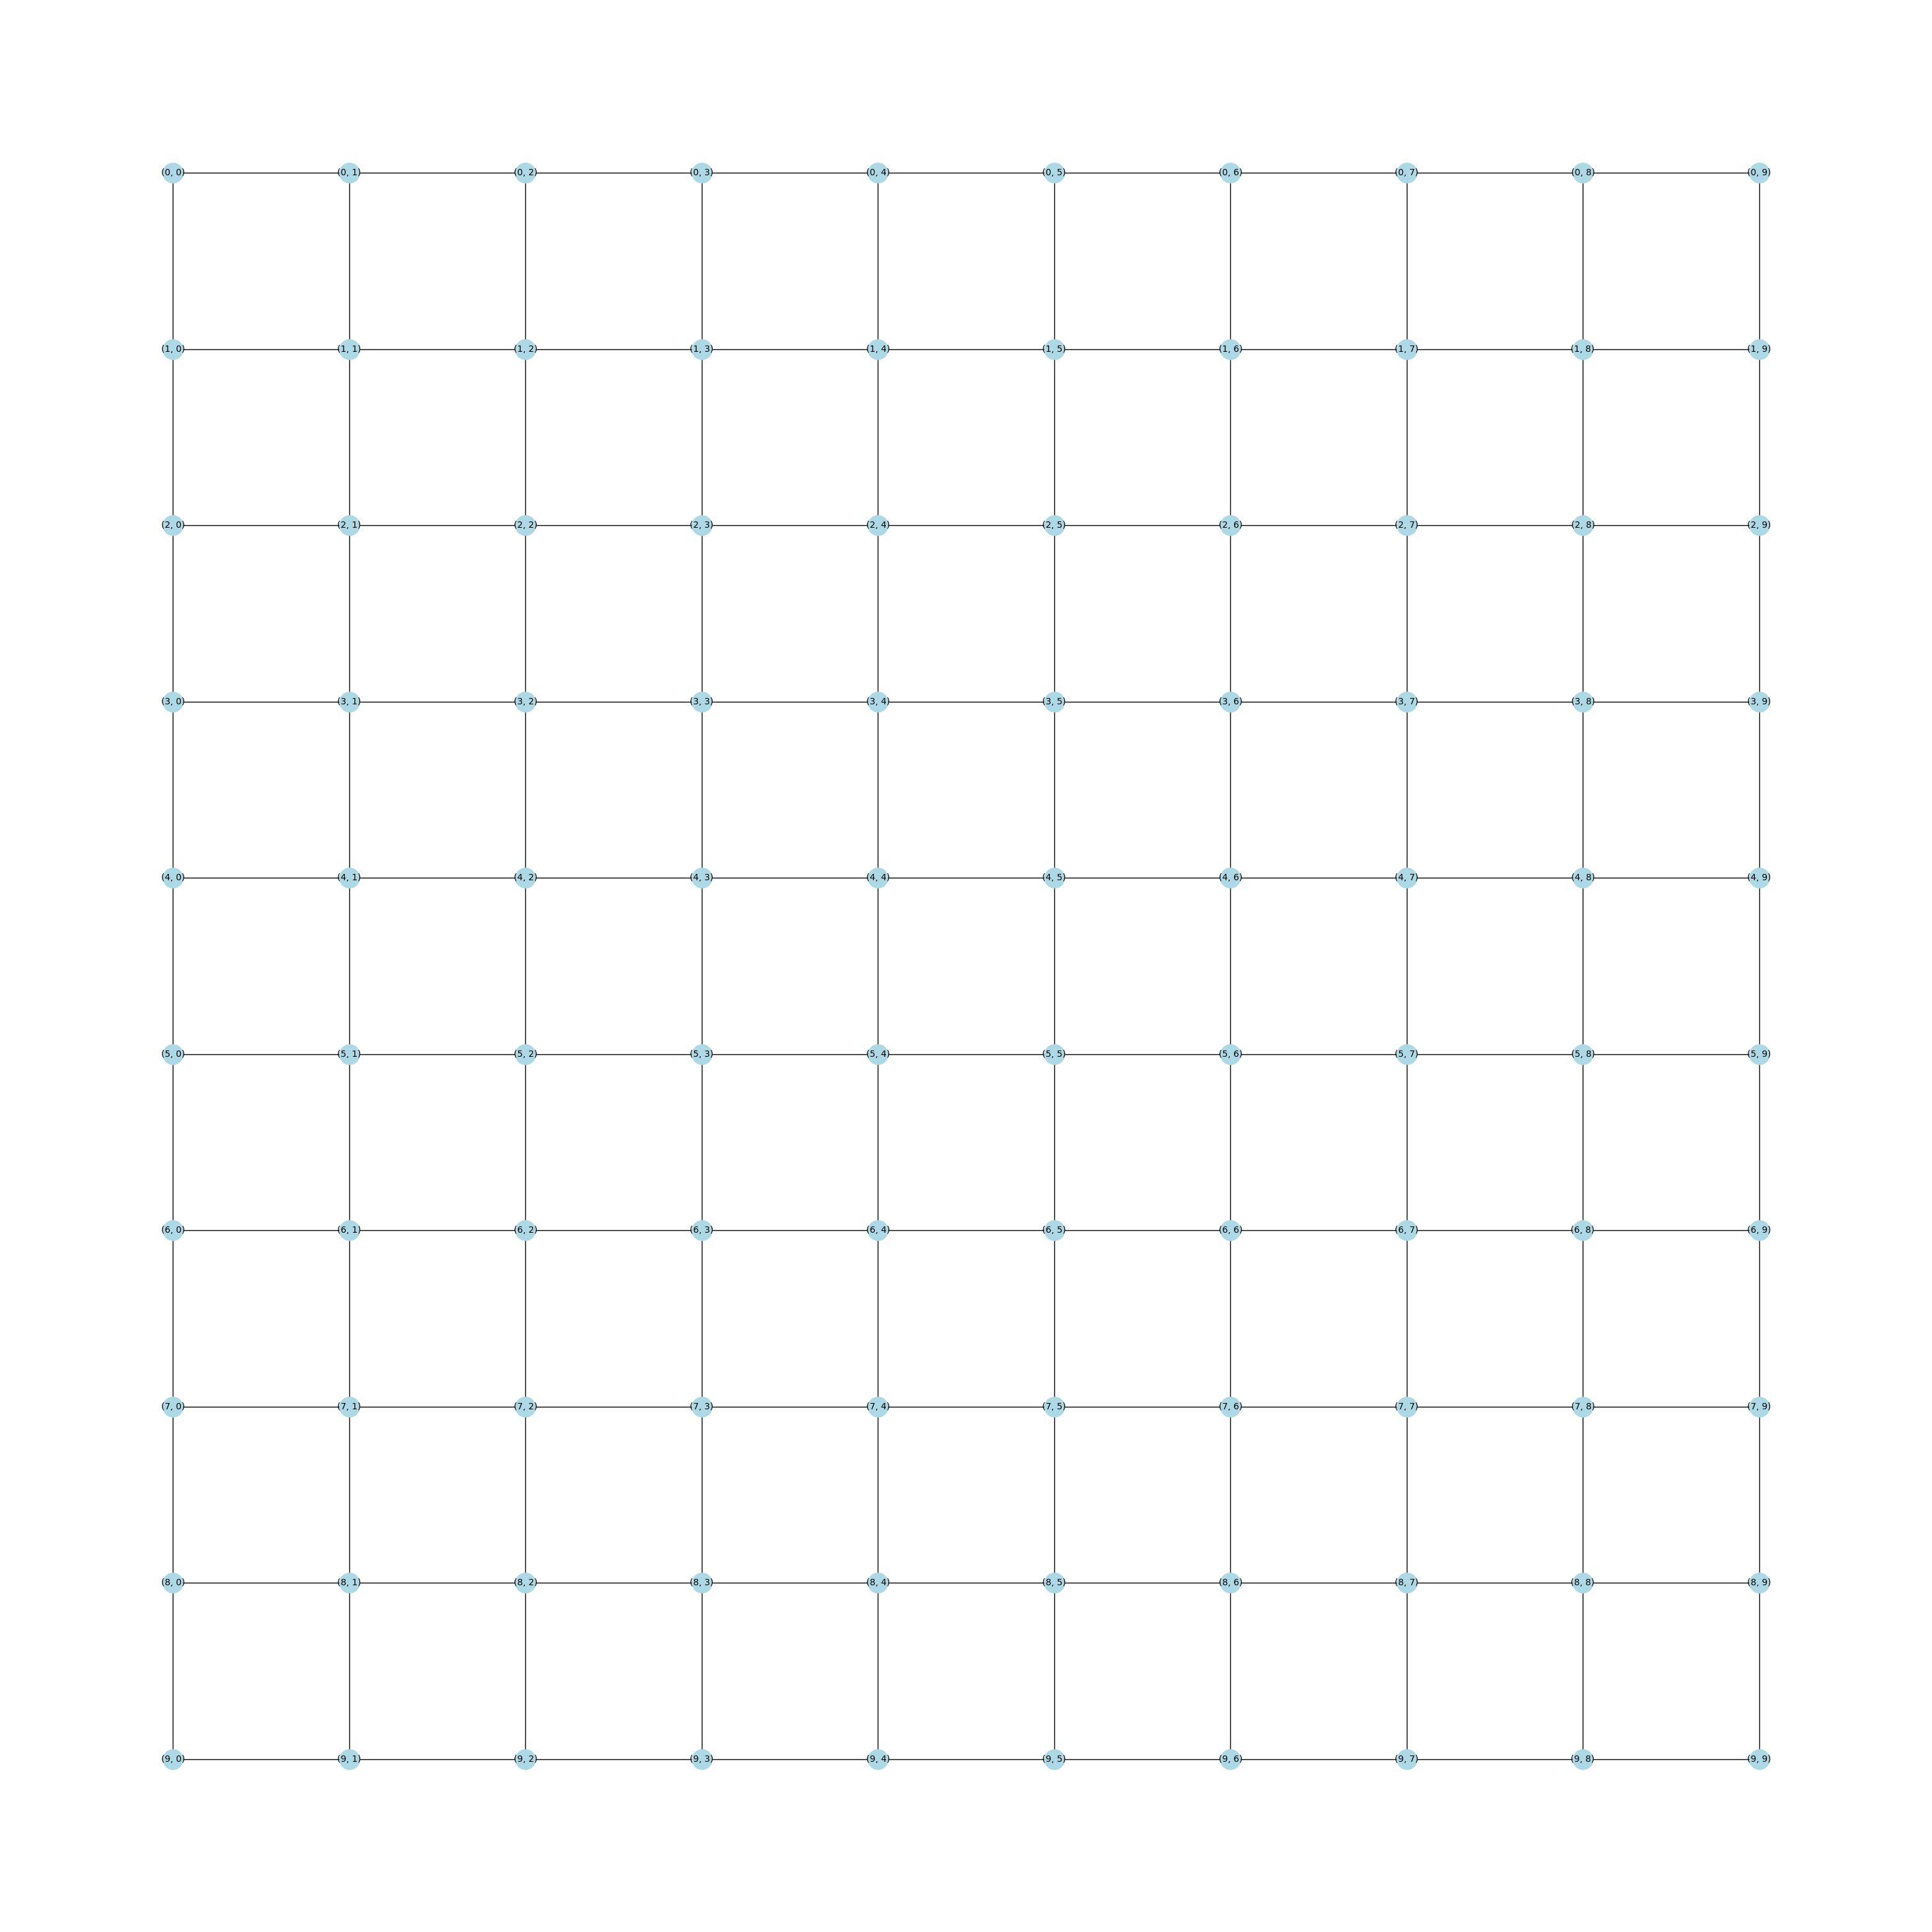

In [5]:
startNode = (0, 0)
targetNode = (9,9)
graph.visualize_graph_in_grid(minDistanceArray, parent, startNode=startNode, targetNode=targetNode)

In [6]:
minDistanceArray

[[0, 12, 21, 24, 30, 33, 36, 48, 50, 52],
 [21, 18, 20, 24, 25, inf, 47, 48, 54, 55],
 [28, 24, 21, 22, 24, 48, 46, 47, 72, 60],
 [28, 25, 22, 36, 30, 42, 45, 48, 60, 56],
 [28, 26, 24, 26, 28, 36, 40, 50, 52, 54],
 [32, 28, 30, 64, 60, 48, 44, 52, 54, 56],
 [39, 36, 40, 42, 45, 46, 46, 56, 58, inf],
 [40, 40, 42, 45, 48, 48, 48, 58, 59, 66],
 [50, 48, 44, 48, 60, 60, 54, 57, 60, 64],
 [52, 50, 56, 54, 61, 60, 56, inf, inf, inf]]

(9, 6)


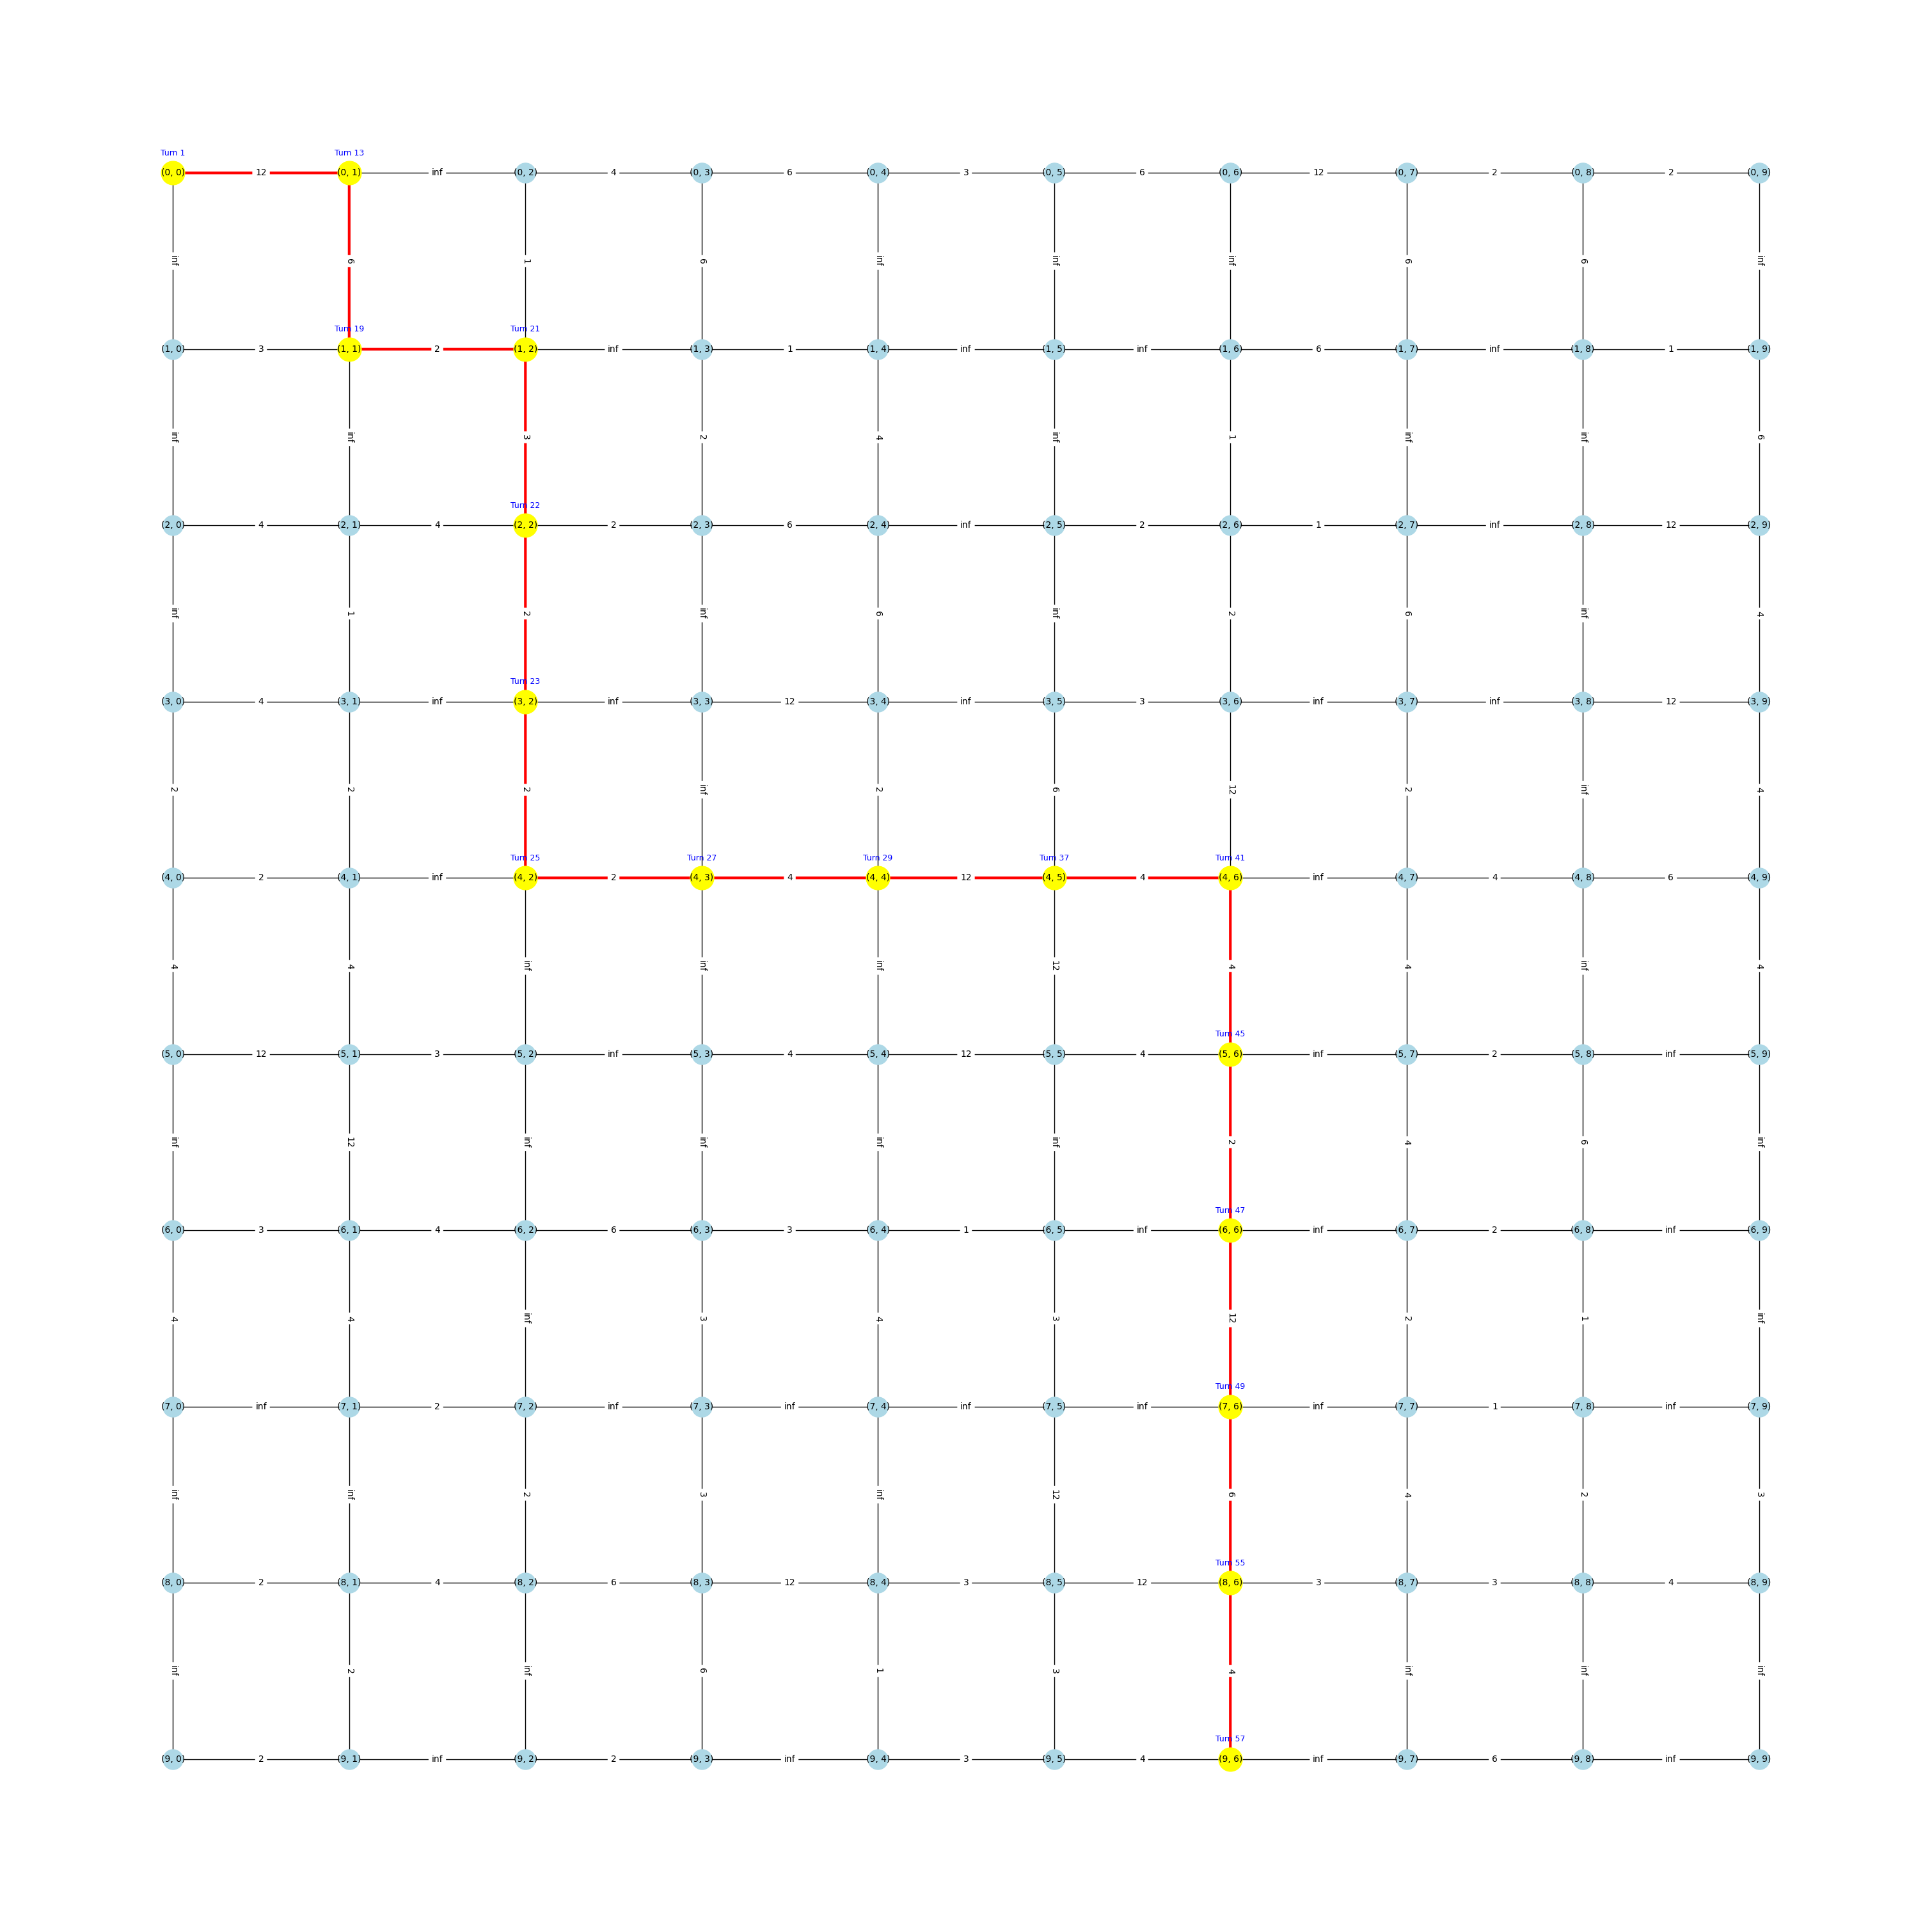

In [7]:
startNode = (0, 0)
targetNode = (9,6)
graph.visualize_graph_in_grid(minDistanceArray, parent, startNode=startNode, targetNode=targetNode)

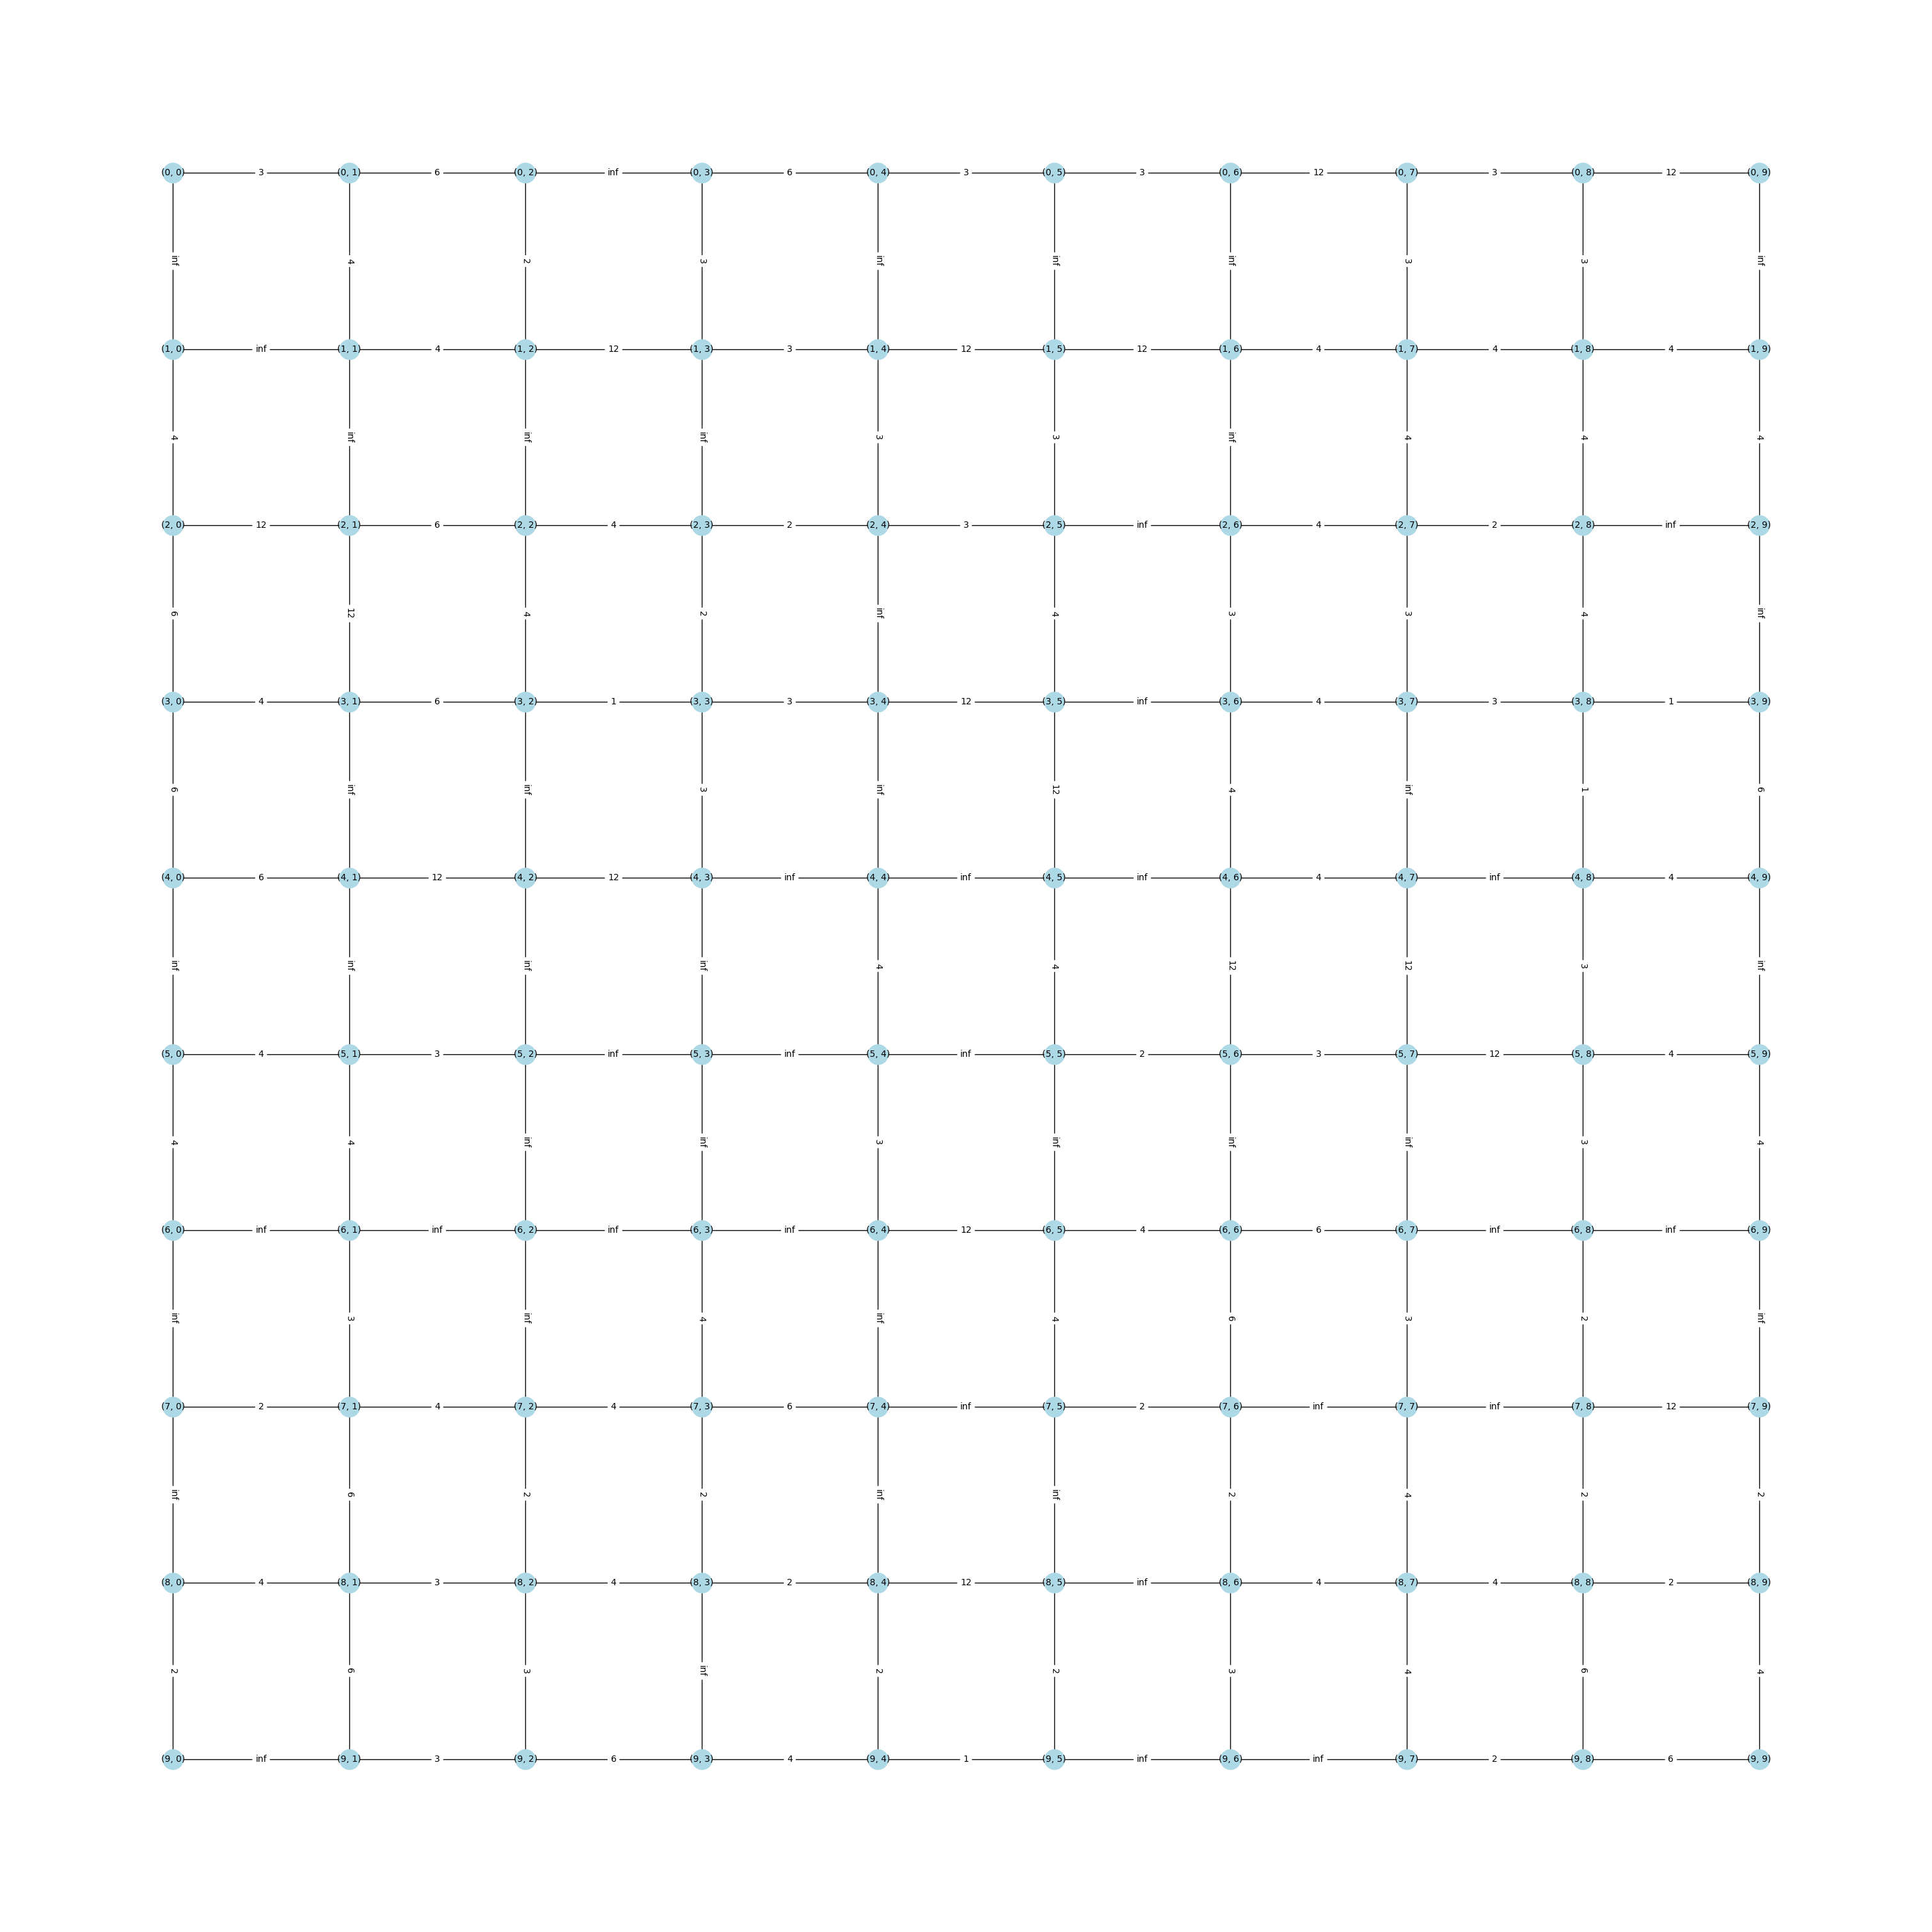

In [20]:
graph.visualize_graph_in_grid()